### Importing Important Libraries

In [25]:
import math
import sympy  as sp
from sympy.matrices import Matrix
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import pprint
pp=pprint.PrettyPrinter(indent=5)

##### Declaring Variables


In [26]:
theta_i, alpha_i, d_i, a_i, A_i, a_3, d_1, d_3, d_5, d_7 = sp.symbols('theta_i alpha_i d_i a_i A_i a_3 d_1, d_3, d_5, d_7')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7 = sp.symbols ('theta_1,theta_2, theta_3, theta_4, theta_5, theta_6, theta_7')

##### Rotation and Translation Matrices


In [27]:
Rot_z = sp.Matrix([ [sp.cos(theta_i), -sp.sin(theta_i),0,0], [sp.sin(theta_i),sp.cos(theta_i),0,0], [0,0,1,0], [0,0,0,1] ]);
Rot_x = sp.Matrix([ [1,0,0,0], [0,sp.cos(alpha_i), -sp.sin(alpha_i),0], [0, sp.sin(alpha_i), sp.cos(alpha_i), 0], [0,0,0,1] ]); 
Tran_z = sp.Matrix([[1,0,0,0], [0,1,0,0], [0,0,1,d_i], [0,0,0,1]]);
Tran_x = sp.Matrix([[1,0,0,a_i], [0,1,0,0], [0,0,1,0], [0,0,0,1]]);
print("\nRotation Matrix for rotation about Z")
pp.pprint(Rot_z)
print("\nRotation Matrix for rotation about X")
pp.pprint(Rot_x)
print("\nTranslation Matrix for translation about Z")
pp.pprint(Tran_z)
print("\nTranslation Matrix for translation about X")
pp.pprint(Tran_x)


Rotation Matrix for rotation about Z
Matrix([
[cos(theta_i), -sin(theta_i), 0, 0],
[sin(theta_i),  cos(theta_i), 0, 0],
[           0,             0, 1, 0],
[           0,             0, 0, 1]])

Rotation Matrix for rotation about X
Matrix([
[1,            0,             0, 0],
[0, cos(alpha_i), -sin(alpha_i), 0],
[0, sin(alpha_i),  cos(alpha_i), 0],
[0,            0,             0, 1]])

Translation Matrix for translation about Z
Matrix([
[1, 0, 0,   0],
[0, 1, 0,   0],
[0, 0, 1, d_i],
[0, 0, 0,   1]])

Translation Matrix for translation about X
Matrix([
[1, 0, 0, a_i],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])


##### General Homogeneous Matrix

In [28]:
A_i=Rot_z*Tran_z*Tran_x*Rot_x;
pp.pprint(A_i)

Matrix([
[cos(theta_i), -sin(theta_i)*cos(alpha_i),  sin(alpha_i)*sin(theta_i), a_i*cos(theta_i)],
[sin(theta_i),  cos(alpha_i)*cos(theta_i), -sin(alpha_i)*cos(theta_i), a_i*sin(theta_i)],
[           0,               sin(alpha_i),               cos(alpha_i),              d_i],
[           0,                          0,                          0,                1]])


### DH Parameter Table for Fixed $\theta_3$

| Link | $a_i$ | $\theta_i$ | $\alpha_i$ | $d_i$ |
| --- | --- | --- | --- | --- |
| 1 | 0 | $\theta_1^*$ | 90 | $d_1$ |
| 2 | 0 | $\theta_2^*$ | -90 | 0 |
| 3 | $a_3$ | 0 | -90 | $d_3$ |
| 4 | $-a_3$ | $\theta_4^*$ | 90 | 0 |
| 5 | 0 | $\theta_5^*$ | 90 | $d_5$ |
| 6 | $a_3$ | $\theta_6^*$ | -90 | 0 |
| 7 | 0 | $\theta_7^*$ | 0 | $-d_7$ |

##### Homogenous Matrix A1

In [202]:
A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(90)),(a_i,0),(d_i,d_1)])
A1

Matrix([
[cos(theta_1), -6.12323399573677e-17*sin(theta_1),     1.0*sin(theta_1),   0],
[sin(theta_1),  6.12323399573677e-17*cos(theta_1),    -1.0*cos(theta_1),   0],
[           0,                                1.0, 6.12323399573677e-17, d_1],
[           0,                                  0,                    0,   1]])

##### Homogenous Matrix A2

In [ ]:
A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(-90)),(a_i,0),(d_i,0)])
A2

##### Homogenous Matrix A3

In [ ]:
A3=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(-90)),(a_i,a_3),(d_i,d_3)])
A3

##### Homogenous Matrix A4

In [ ]:
A4=A_i.subs([(theta_i,theta_4),(alpha_i,math.radians(90)),(a_i,-a_3),(d_i,0)])
A4

##### Homogenous Matrix A5

In [ ]:
A5=A_i.subs([(theta_i,theta_5),(alpha_i,math.radians(90)),(a_i,0),(d_i,d_5)])
A5

##### Homogenous Matrix A6

In [ ]:
A6=A_i.subs([(theta_i,theta_6),(alpha_i,math.radians(-90)),(a_i,a_3),(d_i,0)])
A6

##### Homogenous Matrix A7

In [ ]:
A7=A_i.subs([(theta_i,theta_7),(alpha_i,math.radians(0)),(a_i,0),(d_i,-d_7)])
A7


### Steps to Get the Jacobian Matrix usinh Method 2

##### Transformation Matrix  $T_e^0$ from $O_0$ to $O_e$

In [217]:
T1=A1
T2=A1*A2
T3=A1*A2*A3
T4=A1*A2*A3*A4
T5=A1*A2*A3*A4*A5
T6=A1*A2*A3*A4*A5*A6
T7=A1*A2*A3*A4*A5*A6*A7
T = T7.subs([(theta_1,0),(theta_2,0),(theta_4,math.radians(90))
             ,(theta_5,0),(theta_6, math.radians(180)),(theta_7,0)])
T=T.subs([(d_1,0.3330),(d_3,0.3160),(d_5,0.3840),(d_7,0.2070),(a_3,0.0880)]);
print("Transformation Matrix with joint angle set to required position")
T


Transformation Matrix with joint angle set to required position


Matrix([
[ 6.12323399573677e-17, -1.83697019872103e-16,                  -1.0,                0.679],
[-6.12323399573676e-17,                   1.0, -1.83697019872103e-16, 5.07616098246578e-17],
[                  1.0,  6.12323399573677e-17,  6.12323399573677e-17,                0.825],
[                    0,                     0,                     0,                    1]])

#### Calculating the Z vector for all links

In [218]:
print ("The Z0 matrix is given:")
Z0 = T1[:3,2]
pp.pprint(Z0)

The Z0 matrix is given:
Matrix([
[    1.0*sin(theta_1)],
[   -1.0*cos(theta_1)],
[6.12323399573677e-17]])


In [219]:
print ("The Z1 matrix is given:")
Z1 = T2[:3,2]
pp.pprint(Z1)

The Z1 matrix is given:
Matrix([
[-6.12323399573677e-17*sin(theta_1)*cos(theta_2) + 6.12323399573677e-17*sin(theta_1) - 1.0*sin(theta_2)*cos(theta_1)],
[-1.0*sin(theta_1)*sin(theta_2) + 6.12323399573677e-17*cos(theta_1)*cos(theta_2) - 6.12323399573677e-17*cos(theta_1)],
[                                                                            1.0*cos(theta_2) + 3.74939945665464e-33]])


In [215]:
print ("The Z2 matrix is given:")
Z2 = T4[:3,2]
pp.pprint(Z2)

The Z2 matrix is given:
Matrix([
[1.0*(-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*sin(theta_4) - 1.0*(6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*cos(theta_4) - 4.59169004331693e-49*sin(theta_1)*cos(theta_2) - 6.12323399573677e-17*sin(theta_1) - 7.49879891330929e-33*sin(theta_2)*cos(theta_1)],
[ 1.0*(sin(theta_1)*cos(theta_2) + 6.12323399573677e-17*sin(theta_2)*cos(theta_1))*sin(theta_4) - 1.0*(1.0*sin(theta_1)*sin(theta_2) - 6.12323399573677e-17*cos(theta_1)*cos(theta_2) + 1.22464679914735e-16*cos(theta_1))*cos(theta_4) - 7.49879891330929e-33*sin(theta_1)*sin(theta_2) + 4.59169004331693e-49*cos(theta_1)*cos(theta_2) + 6.12323399573677e-17*cos(theta_1)],
[                                                                                                                                                                                                                     -1.0*(-1.0*cos(th

In [143]:
print ("The Z4 matrix is given:")
Z4 = T5[:3,2]
pp.pprint(Z4)


The Z3 matrix is given:


Matrix([
[1.0*((-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_4) + (6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*sin(theta_4))*sin(theta_5) + 6.12323399573677e-17*(-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*sin(theta_4) - 6.12323399573677e-17*(6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*cos(theta_4) - 1.0*(-6.12323399573677e-17*(-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*sin(theta_4) + 6.12323399573677e-17*(6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*cos(theta_4) - 7.49879891330929e-33*sin(theta_1)*cos(theta_2) - 1.0*sin(theta_1) - 1.22464679914735e-16*sin(theta_2)*cos(theta_1))*cos(theta_5) - 2.81159925711243e-65*sin(theta_1)*cos(theta_2) - 3.74939945665464e-33*sin(t

In [207]:
print ("The Z5 matrix is given:")
Z5 = T6[:3,2]
pp.pprint(Z5)

The Z5 matrix is given:
Matrix([
[-1.0*(((-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_4) + (6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*sin(theta_4))*cos(theta_5) + (-6.12323399573677e-17*(-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*sin(theta_4) + 6.12323399573677e-17*(6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*cos(theta_4) - 7.49879891330929e-33*sin(theta_1)*cos(theta_2) - 1.0*sin(theta_1) - 1.22464679914735e-16*sin(theta_2)*cos(theta_1))*sin(theta_5))*sin(theta_6) + 6.12323399573677e-17*((-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_4) + (6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*sin(theta_4))*sin(theta_5) + 3.74939945665464e-33*(-6.12323399573677e-17*s

In [208]:
print ("The Z6 matrix is given:")
Z6 = T7[:3,2]
pp.pprint(Z6)

The Z6 matrix is given:
Matrix([
[-1.0*(((-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_4) + (6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*sin(theta_4))*cos(theta_5) + (-6.12323399573677e-17*(-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*sin(theta_4) + 6.12323399573677e-17*(6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*cos(theta_4) - 7.49879891330929e-33*sin(theta_1)*cos(theta_2) - 1.0*sin(theta_1) - 1.22464679914735e-16*sin(theta_2)*cos(theta_1))*sin(theta_5))*sin(theta_6) + 6.12323399573677e-17*((-6.12323399573677e-17*sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2))*cos(theta_4) + (6.12323399573677e-17*sin(theta_1)*cos(theta_2) - 1.22464679914735e-16*sin(theta_1) + 1.0*sin(theta_2)*cos(theta_1))*sin(theta_4))*sin(theta_5) + 3.74939945665464e-33*(-6.12323399573677e-17*s

#### Forming the columns $J_1$ to $J_6$ of the Jacobian Matrix

In [220]:
Xp=T7[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1

diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2

diff_thet_4 = Xp.diff(theta_4) #Partially differentiating Xp wrt θ4

diff_thet_5 = Xp.diff(theta_5) #Partially differentiating Xp wrt θ5

diff_thet_6 = Xp.diff(theta_6) #Partially differentiating Xp wrt θ6

diff_thet_7 = Xp.diff(theta_7) #Partially differentiating Xp wrt θ7

print("The initial jacobian matrix for home position is given by:")
J = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_4[0],diff_thet_5[0],diff_thet_6[0],diff_thet_7[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_4[1],diff_thet_5[1],diff_thet_6[1],diff_thet_7[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_4[2],diff_thet_5[2],diff_thet_6[2],diff_thet_7[2]],
          [Z0[0],Z1[0],Z2[0],Z4[0],Z5[0],Z6[1]],[Z0[1],Z1[1],Z2[1],Z4[1],Z5[1],Z6[1]],[Z0[2],Z1[2],Z2[2],Z4[2],Z5[2],Z6[2]]])

J1=J.subs([(theta_1,0),(theta_2,0),(theta_4,math.radians(90))
             ,(theta_5,0),(theta_6, math.radians(180)),(theta_7,0)])
J1=J1.subs([(d_1,0.3330),(d_3,0.3160),(d_5,0.3840),(d_7,0.2070),(a_3,0.0880)])
J1

The initial jacobian matrix for home position is given by:


Matrix([
[-5.07616098246578e-17,               -0.492,                0.176,  5.38844591624835e-18,                -0.088,                     0],
[                0.679, 4.15767588310526e-17, 3.61883129148043e-17,                -0.088, -2.34519862036718e-17,                     0],
[                    0,                0.679,               -0.591,  1.99617428261019e-17,                 0.207,                     0],
[                    0,                    0,                  1.0,  1.22464679914735e-16,                  -1.0, -1.83697019872103e-16],
[                 -1.0,                    0, 6.12323399573677e-17,                  -1.0, -1.83697019872103e-16, -1.83697019872103e-16],
[ 6.12323399573677e-17,                  1.0, 6.12323399573677e-17, -6.12323399573677e-17,  6.12323399573677e-17,  6.12323399573677e-17]])

### Substitutng Link Lengths

In [188]:
J=J.subs([(d_1,0.3330),(d_3,0.3160),(d_5,0.3840),(d_7,0.2070),(a_3,0.0880)]);J

### Circle equations

#### The equation of ciecle is given by
$y^2+(z-72.5)^2=100$  
Using the polar form  
$y=r\cos(\theta),z=r\sin(\theta)$  
Therefore,  
$\dot{y}=r\cos(\theta)\dot{\theta}$  
$\dot{z}=r\sin(\theta)\dot{\theta}$

Also, $\dot{\theta}=\frac{2\pi}{5}$

#### Using the above equations and the Jacobian matrix we compute the tool positions over a time period using Numerical Integration

In [ ]:
import numpy as np
import sympy as sp
x,y,z,r,o=sp.symbols("x y z r theta")
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[math.radians(0)]  #Theta 2
t_4=[math.radians(90)]  #Theta 4
t_5=[math.radians(0)]  #Theta 5
t_6=[math.radians(180)]  #Theta 6
t_7=[math.radians(0)]  #Theta 7

T=T7.subs([(d_1,0.3330),(d_3,0.3160),(d_5,0.3840),(d_7,0.2070),(a_3,0.0880)]);T
x_tool=[]
y_tool=[]
z_tool=[]
#Tool Velocity Matrix
X=sp.Matrix([[0],[0.1*sp.cos((2*np.pi*o)/100)*(2*np.pi)/5],[-0.1*sp.sin((2*np.pi*o)/100)*(2*np.pi)/5],[0],[0],[0]])
i=0
print("Computing Trajectory")
while i<=100:
    X_eval=X.subs(o,i)
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,math.radians(0)),(theta_4,t_4[i]),
              (theta_5,t_5[i]),(theta_6,t_6[i]),(theta_7,t_7[i])])
    x_tool.append(T_eval[3])
    y_tool.append(T_eval[7])
    z_tool.append(T_eval[11])
    J_eval=J.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,math.radians(0)),(theta_4,t_4[i]),
              (theta_5,t_5[i]),(theta_6,t_6[i]),(theta_7,t_7[i])])
    q=J_eval.inv('LU')*X_eval
    q=q*dt
    
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_4.append(q[2]+t_4[i])
    t_5.append(q[3]+t_5[i])
    t_6.append(q[4]+t_6[i])
    t_7.append(q[5]+t_7[i])
    print(".",end="")
    i=i+1


import matplotlib.pyplot as plt
plt.plot(y_tool,z_tool)
plt.plot(0,0.725)
plt.xlabel("y coordinate")
plt.ylabel("z coordinate")
plt.axis("equal")
plt.title("Trajectory of Robot")
plt.grid(True)
plt.show()  

Computing Trajectory
.

### Plotting trajectory in 2D Space

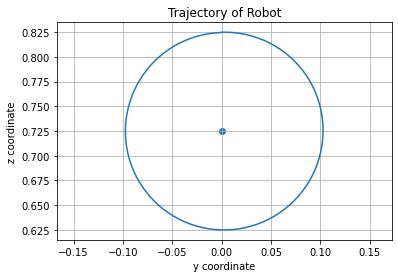

In [197]:
import matplotlib.pyplot as plt
plt.plot(y_tool,z_tool)
plt.scatter(0,0.725)
plt.xlabel("y coordinate")
plt.ylabel("z coordinate")
plt.axis("equal")
plt.title("Trajectory of Robot")
plt.grid(True)
plt.show()

### Plotting Trajectory in 3D Space

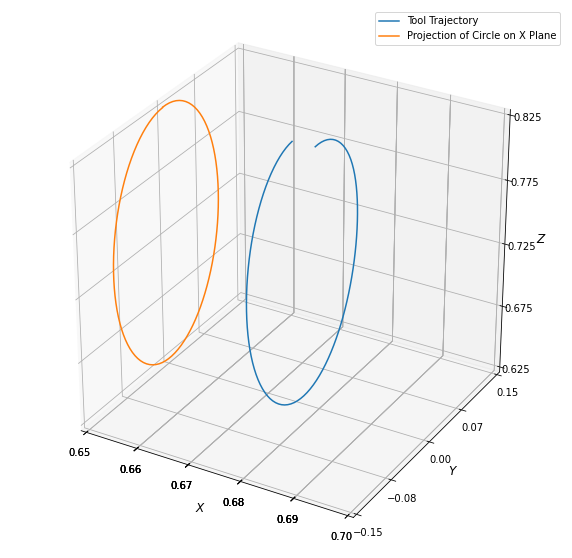

In [201]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0.65, right=0.7) 
ax.axes.set_ylim3d(bottom=-0.15, top=0.15) 
ax.axes.set_zlim3d(bottom=0.625, top=0.825) 
ax.set_xlabel('$X$', fontsize=12)
ax.set_ylabel('$Y$', fontsize=12)
ax.set_zlabel('$Z$', fontsize=12)
ax.set_zticks(np.linspace(0.625,0.825,5).round(3))
ax.set_xticks(np.linspace(0.65,0.7,20).round(2))
ax.set_yticks(np.linspace(-0.15,0.15,5).round(2))
ax.plot(x_tool, y_tool, z_tool, label='Tool Trajectory')
ax.plot(np.full(len(y_tool),0.65), y_tool, z_tool, label='Projection of Circle on X Plane')
ax.legend()

plt.show()
